In [1]:
# import lib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt

In [2]:
# load and preprocess CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [3]:
# define model creation function
def create_model(use_regularization=False):
    model = keras.Sequential([
        layers.Input(shape=(32, 32, 3)),

        layers.Conv2D(32, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4) if use_regularization else None),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4) if use_regularization else None),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),

        layers.Dense(128, activation='relu',
                     kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4) if use_regularization else None),

        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [4]:
# train baseline model (no regularization)
baseline_model = create_model(use_regularization=False)
history_baseline = baseline_model.fit(x_train, y_train,
                                      validation_split=0.2,
                                      epochs=10, batch_size=64, verbose=0)

In [5]:
# train L1_L2 regularized model
regularized_model = create_model(use_regularization=True)
history_regularized = regularized_model.fit(x_train, y_train,
                                            validation_split=0.2,
                                            epochs=10, batch_size=64, verbose=0)

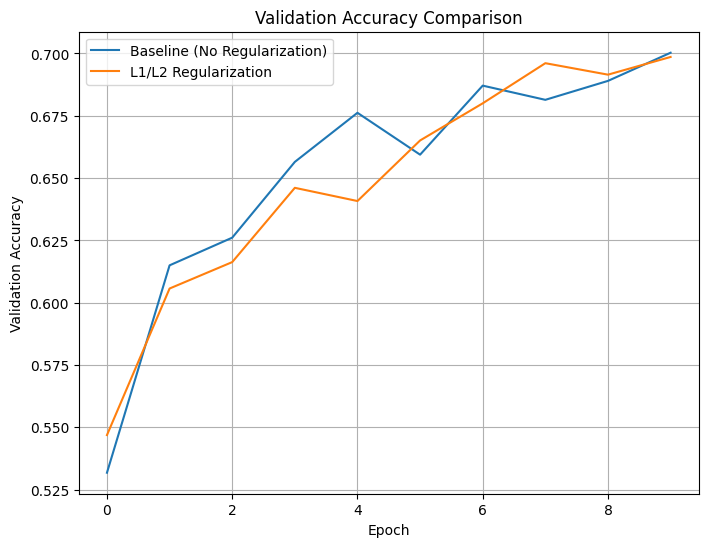

In [6]:
# plot validation accuracy
plt.figure(figsize=(8,6))
plt.plot(history_baseline.history['val_accuracy'], label='Baseline (No Regularization)')
plt.plot(history_regularized.history['val_accuracy'], label='L1/L2 Regularization')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# evaluate on test data
test_loss_base, test_acc_base = baseline_model.evaluate(x_test, y_test, verbose=0)
test_loss_reg, test_acc_reg = regularized_model.evaluate(x_test, y_test, verbose=0)

print(f"Baseline Test Accuracy: {test_acc_base:.4f}")
print(f"L1/L2 Regularized Test Accuracy: {test_acc_reg:.4f}")

Baseline Test Accuracy: 0.6975
L1/L2 Regularized Test Accuracy: 0.6928
